## Trending YouTube Video Statistics
#### Daily statistics for trending YouTube videos
-----------

### Step 1. Data Load & EDA

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('./data/KRvideos.csv', engine='python')
# if error occurs like -> "utf-8" codec can"t decode bytes in position 00000-00000: unexpected end of data
# add parameter -> engine="python"

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [12]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


In [13]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...
34566,C-bLqIftDY4,18.14.06,[법륜스님의 즉문즉설 제 1398회] 시동생의 아이를 키우게 됐어요,법륜스님의 즉문즉설,29,2018-06-10T20:00:01.000Z,"불교|""즉문즉설""|""법륜스님""|""정토회""|""buddha""|""buddhism""|""po...",63716,500,58,135,https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg,False,False,False,"3월에 시동생이 이혼했습니다 그러면서 제가중2, 7살, 4살 되는 조카들을 데리고 ..."


In [17]:
df.sort_values(by='likes', ascending=False)[:10]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
30844,7C2z4GqqS5E,18.24.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30583,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",80738011,5053338,165854,1114800,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30352,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30486,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30291,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30171,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30069,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
29969,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
4856,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4678,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656686,1353663,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


In [18]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [19]:
df['description']

0        윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1        [채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2                                          퍼가실때 꼭 출처 부탁드려요
3                                      다스는 누구겁니까 듣고 난 후 표정
4        김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
                               ...                        
34562    - 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563    안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ...
34564    2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565    워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...
34566    3월에 시동생이 이혼했습니다 그러면서 제가중2, 7살, 4살 되는 조카들을 데리고 ...
Name: description, Length: 34567, dtype: object

<AxesSubplot:>

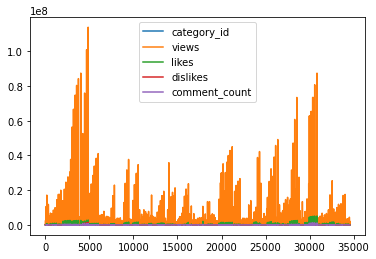

In [20]:
df.plot();

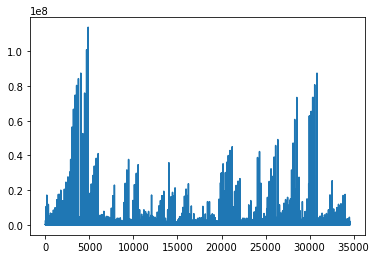

In [22]:
df['views'].plot();

In [23]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.082367,-0.097976,-0.016725,-0.065038,0.026884,0.054086,-0.042891
views,-0.082367,1.000000,0.860043,0.581443,0.807600,-0.003379,-0.019284,-0.002112
likes,-0.097976,0.860043,1.000000,0.428036,0.922731,-0.010734,-0.021390,-0.000232
dislikes,-0.016725,0.581443,0.428036,1.000000,0.555549,-0.002056,-0.008080,-0.000589
comment_count,-0.065038,0.807600,0.922731,0.555549,1.000000,-0.011536,-0.014295,-0.000879
comments_disabled,0.026884,-0.003379,-0.010734,-0.002056,-0.011536,1.000000,0.220468,-0.004221
ratings_disabled,0.054086,-0.019284,-0.021390,-0.008080,-0.014295,0.220468,1.000000,-0.007080
video_error_or_removed,-0.042891,-0.002112,-0.000232,-0.000589,-0.000879,-0.004221,-0.007080,1.000000


In [30]:
import matplotlib.pyplot as plt
plt.style.use('dark_background');

In [38]:
df['views']

0        156130
1         76533
2        421409
3        222850
4         84466
          ...  
34562    156439
34563    130948
34564     62555
34565     63306
34566     63716
Name: views, Length: 34567, dtype: int64

In [39]:
df['views'].values

array([156130,  76533, 421409, ...,  62555,  63306,  63716])

In [44]:
df['views'].sort_values(ascending=False)

4856     113876217
4678     100911567
4018      87450245
30844     87430865
3750      84281319
           ...    
4806          3268
18568         3124
17414         2919
509           2623
1071          2050
Name: views, Length: 34567, dtype: int64

In [45]:
top500_views = df['views'].sort_values(ascending=False)[:500]

In [48]:
top500_views

4856     113876217
4678     100911567
4018      87450245
30844     87430865
3750      84281319
           ...    
13244      3316015
13317      3316015
19121      3312590
8973       3307126
1569       3304059
Name: views, Length: 500, dtype: int64

In [52]:
top500_views.reset_index()

,index,views
0,4856,113876217
1,4678,100911567
2,4018,87450245
3,30844,87430865
4,3750,84281319
...,...,...
495,13244,3316015
496,13317,3316015
497,19121,3312590
498,8973,3307126


In [55]:
top500_views = top500_views.reset_index().copy()

In [63]:
top500_views.drop(['index'], axis=1, inplace=True)

In [64]:
top500_views

,views
0,113876217
1,100911567
2,87450245
3,87430865
4,84281319
...,...
495,3316015
496,3316015
497,3312590
498,3307126


In [68]:
top500_views.index

RangeIndex(start=0, stop=500, step=1)

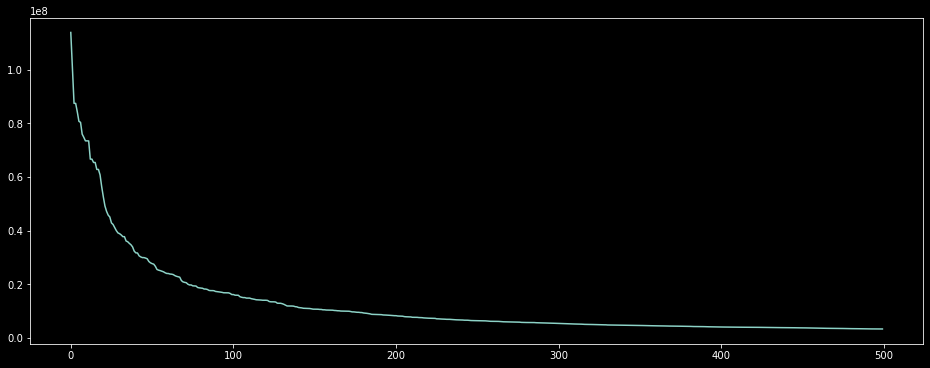

In [71]:
plt.figure(figsize=(16,6))
plt.plot(top500_views.index, top500_views.values);

In [72]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [74]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [76]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


#### Heatmap

<AxesSubplot:>

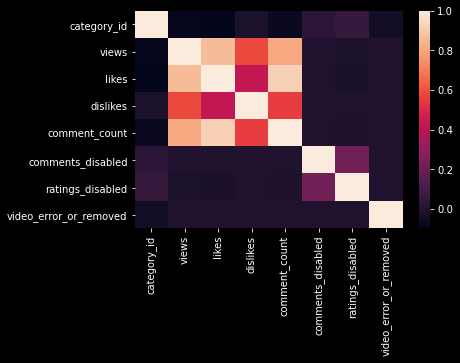

In [82]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:>

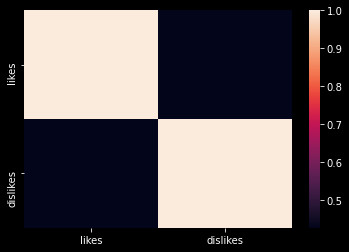

In [83]:
sns.heatmap(df[['likes','dislikes']].corr())

<AxesSubplot:>

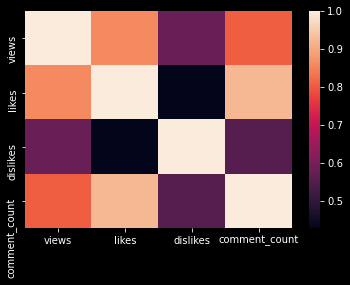

In [84]:
sns.heatmap(df[['views','likes','dislikes','comment_count']].corr())

<AxesSubplot:>

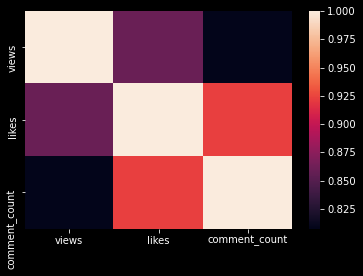

In [85]:
sns.heatmap(df[['views','likes','comment_count']].corr())

<AxesSubplot:>

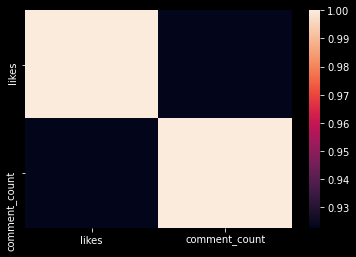

In [86]:
sns.heatmap(df[['likes','comment_count']].corr())

<AxesSubplot:>

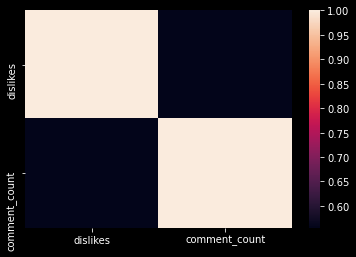

In [87]:
sns.heatmap(df[['dislikes','comment_count']].corr())

#### Check the Ratio of "Boolean" values

In [93]:
(df.comments_disabled == True).sum() / len(df.comments_disabled)

0.01478288541094107

In [95]:
(df.ratings_disabled == True).sum() / len(df.ratings_disabled)

0.0405010559203865

In [96]:
(df.video_error_or_removed == True).sum() / len(df.video_error_or_removed)

0.001186102351954176

#### Time Series

In [102]:
df.trending_date

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
34562    18.14.06
34563    18.14.06
34564    18.14.06
34565    18.14.06
34566    18.14.06
Name: trending_date, Length: 34567, dtype: object

In [101]:
(df.trending_date.str.contains('.') == False).sum()

0